In [1]:
print("Kernal Started")

Kernal Started


In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
print(tf.config.list_physical_devices('GPU'))
print(tf.test.is_built_with_cuda())

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
True


# VGG16 Model Experiment 1

In [5]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

from sklearn.metrics import confusion_matrix

import itertools
import os
import shutil
import random
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import tensorflow as tf
vgg16_model = tf.keras.applications.VGG16(
    input_shape=(224, 224, 3),  # Custom input shape
    weights='imagenet',          # Use pre-trained weights
    include_top=False            # Exclude fully connected layers
)


In [7]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [8]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [10]:
for layer in model.layers:
    layer.trainable = False

In [11]:
model.add(GlobalAveragePooling2D())
model.add(Dense(units=3, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [13]:
train_path = 'Data/train'
valid_path = 'Data/valid'

In [14]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['mite', 'normal', 'yellow'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['mite', 'normal', 'yellow'], batch_size=10)


Found 1480 images belonging to 3 classes.
Found 420 images belonging to 3 classes.


In [15]:
imgs, labels = next(train_batches)

In [16]:
def plot_images(images_arr):
    fig, axes = plt.subplots(1,10, figsize= (20,20))
    axes = axes.flatten()
    
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()  

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

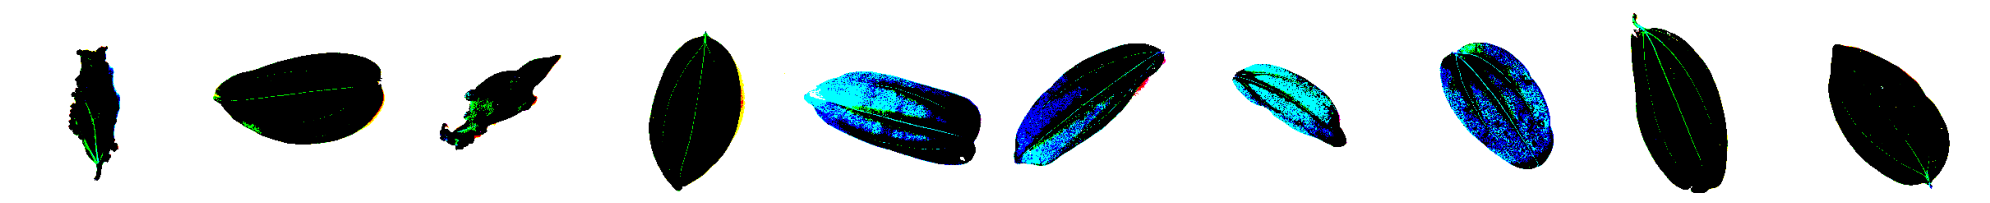

[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [17]:
plot_images(imgs)
print(labels)

In [18]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=1)

Epoch 1/10
148/148 [==============================] - 193s 1s/step - loss: 0.6440 - accuracy: 0.7257 - val_loss: 0.3287 - val_accuracy: 0.9000
Epoch 2/10
148/148 [==============================] - 99s 670ms/step - loss: 0.2651 - accuracy: 0.9122 - val_loss: 0.1554 - val_accuracy: 0.9667
Epoch 3/10
148/148 [==============================] - 106s 717ms/step - loss: 0.1438 - accuracy: 0.9676 - val_loss: 0.0921 - val_accuracy: 0.9857
Epoch 4/10
148/148 [==============================] - 150s 1s/step - loss: 0.0924 - accuracy: 0.9872 - val_loss: 0.0624 - val_accuracy: 0.9952
Epoch 5/10
148/148 [==============================] - 194s 1s/step - loss: 0.0654 - accuracy: 0.9912 - val_loss: 0.0459 - val_accuracy: 0.9952
Epoch 6/10
148/148 [==============================] - 175s 1s/step - loss: 0.0495 - accuracy: 0.9946 - val_loss: 0.0356 - val_accuracy: 1.0000
Epoch 7/10
148/148 [==============================] - 137s 926ms/step - loss: 0.0391 - accuracy: 0.9959 - val_loss: 0.0287 - val_accuracy

In [20]:
print("Done")

Done


In [21]:
model.save('vgg16_2.h5')

import pickle
with open('history_vgg16_2.pkl', 'wb') as file:
    pickle.dump(history.history, file)


### To get history
```python
import pickle
with open('history.pkl', 'rb') as file:
    saved_history = pickle.load(file)
```
)


# Evaluating this Model

In [22]:
print(model.history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [23]:
test_path = 'Data/test'

In [24]:
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['mite', 'normal', 'yellow'], batch_size=10, shuffle=False)


Found 205 images belonging to 3 classes.


In [25]:
score = model.evaluate(test_batches)
print(score)

21/21 [==============================] - 40s 2s/step - loss: 0.0196 - accuracy: 1.0000
[0.019581817090511322, 1.0]


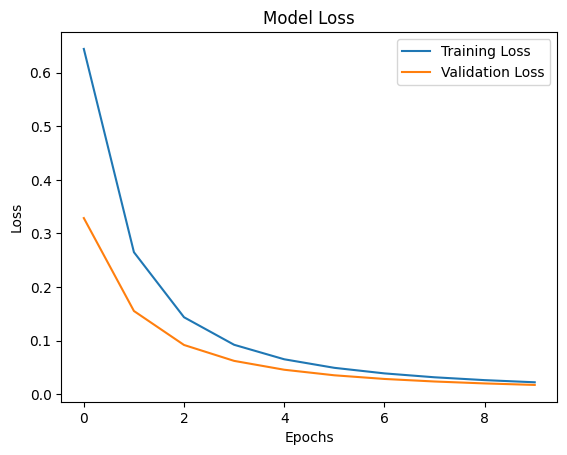

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()


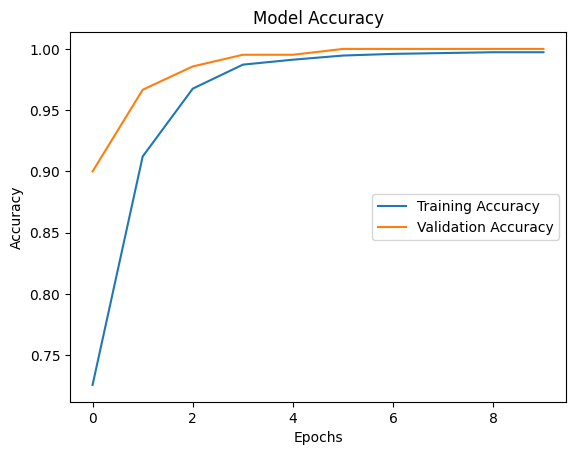

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='center right')
plt.show()


In [28]:
predictions= model.predict(test_batches)

21/21 [==============================] - 20s 975ms/step


In [29]:
rounded_prediction = np.argmax(predictions,axis=-1)

In [30]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max()/2.

    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [31]:
cm = confusion_matrix(y_true=test_batches.classes,y_pred=rounded_prediction)

In [32]:
cm_plot_labels=["mite","normal","yellow"]

Confusion matrix, without normalization
[[70  0  0]
 [ 0 70  0]
 [ 0  0 65]]


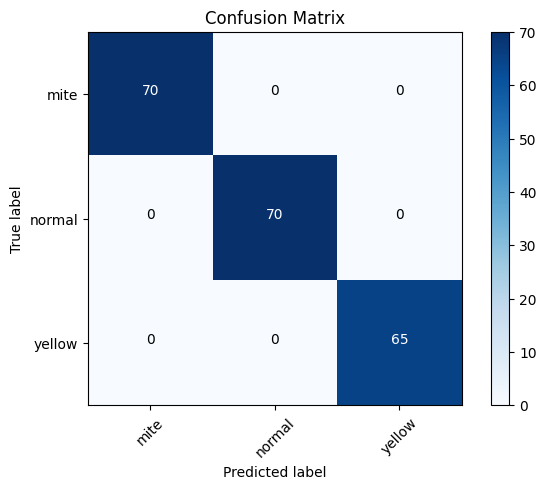

In [33]:
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [34]:
from sklearn.metrics import classification_report

print(classification_report(test_batches.classes,rounded_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        70
           2       1.00      1.00      1.00        65

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

